# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,auc
from sklearn.tree._tree import TREE_LEAF

# Importing The Dataset

In [2]:
df = pd.read_csv('data_1.csv')

# Splitting the dataset

In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y = label_binarize(y,classes=[1,2,3])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Function for evaluating model performance

In [4]:
def compute_metrics(model):
  y_pred = model.predict(X_test)
  print("Accuracy ",accuracy_score(y_test,y_pred))
  print("Precision ", precision_score(y_test,y_pred,average='micro'))
  print("Recall ",recall_score(y_test,y_pred,average='micro'))

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(3):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  for i in range(3):
      plt.plot(fpr[i], tpr[i],label='ROC curve of class {0} (area = {1:0.2f})'.format(i+1, roc_auc[i]))

  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('AUC-ROC Curve')
  plt.legend()
  plt.show()

# Training Decision Tree Classifier

In [5]:
decision_tree = DecisionTreeClassifier(random_state=0,criterion="entropy")
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# Before Removing A Node

Accuracy  0.9655172413793104
Precision  0.9655172413793104
Recall  0.9655172413793104


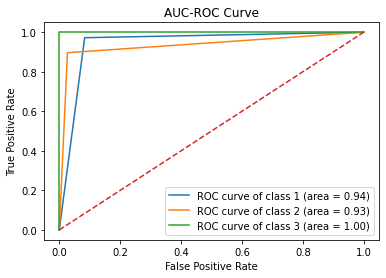

In [6]:
compute_metrics(decision_tree)

In [7]:
fig = plt.figure(figsize=(200,200))
_ = plot_tree(decision_tree,feature_names=df.columns[:-1],filled=True)
fig.savefig("DT_A_1_With_Best_Hyperparameters.png")

Output hidden; open in https://colab.research.google.com to view.

# Removing A Node From Decision Tree

In [8]:
def is_leaf(tree,index):
  return tree.children_right[index]==TREE_LEAF and tree.children_left[index]==TREE_LEAF

In [9]:
def remove_node(tree,limit,index=0):
  if(limit[0]>0):
    return

  if not is_leaf(tree,tree.children_left[index]):
    remove_node(tree,limit,tree.children_left[index])

  if not is_leaf(tree,tree.children_right[index]):
    remove_node(tree,limit,tree.children_right[index])

  if is_leaf(tree,tree.children_left[index]) and limit[0]==0:
    tree.children_left[index] = TREE_LEAF
    limit[0]+=1

In [10]:
count = [0]
remove_node(decision_tree.tree_,count)

# After Removing A Node

Accuracy  0.9689655172413794
Precision  0.9689655172413794
Recall  0.9689655172413794


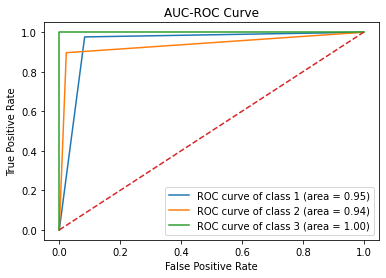

In [11]:
compute_metrics(decision_tree)

In [12]:
fig = plt.figure(figsize=(200,200))
_ = plot_tree(decision_tree,feature_names=df.columns[:-1],filled=True)
fig.savefig("DT_B_1.png")

Output hidden; open in https://colab.research.google.com to view.